In [186]:
%matplotlib inline
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(7)

In [211]:
## look data with pandas
train_file = "data/rupturemodel_train.txt"
val_file = "data/rupturemodel_xvalidate.txt"
test_file = "data/rupturemodel_test.txt"

df = pd.read_csv(train_file, sep=" ", header = None)
df_val= pd.read_csv(val_file, sep=" ", header = None)
df_test= pd.read_csv(test_file, sep=" ", header = None)

columns = ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'value']

df.columns = columns
df_val.columns = columns
df_test.columns = columns

df = df.append(df_val)
df = df.append(df_test)

In [4]:
from keras.utils import to_categorical

mms = StandardScaler()
X = mms.fit_transform(df.drop('value', axis=1))
Y = to_categorical(df['value'].values)
X, Y = shuffle(X, Y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('')
print(X.shape)
print(Y.shape)

print(X_train.shape)
print(Y_train.shape)

Using TensorFlow backend.


NameError: name 'StandardScaler' is not defined

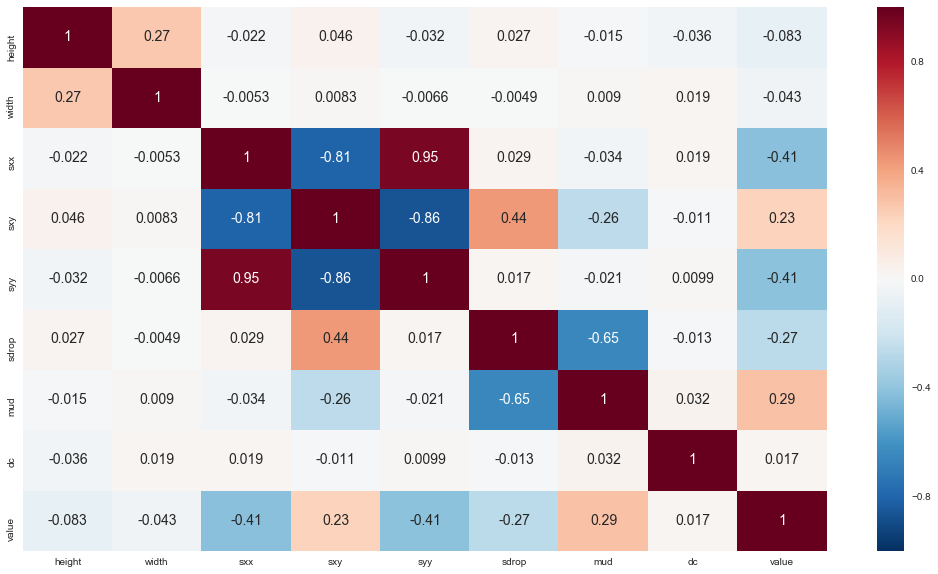

In [213]:
import seaborn as sns
plt.figure(figsize=(18, 10))
plt.rcParams.update({'font.size': 14})
sns.heatmap(df.corr(), annot = True)

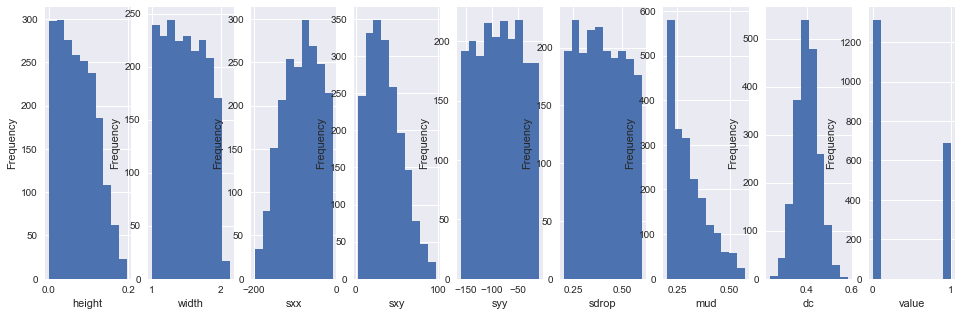

In [214]:
# df.describe()
#plot Histogram

plt.figure(figsize=(20, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 11, i+1)
    df[feature].plot(kind='hist')
    plt.xlabel(feature)

In [222]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20, max_depth=3, criterion ='entropy', random_state=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(Y_pred[0])
Y_test_class = np.argmax(Y_test, axis = 1)
y_pred_class = np.argmax(Y_pred, axis = 1)

[ 1.  0.]


In [216]:
# Benchmark
pd.Series(Y_test_class).value_counts()/len(Y_test_class)

0    0.6825
1    0.3175
dtype: float64

In [217]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test_class, y_pred_class))
print(classification_report(Y_test_class, y_pred_class))

0.81
             precision    recall  f1-score   support

          0       0.82      0.92      0.87       273
          1       0.77      0.57      0.65       127

avg / total       0.81      0.81      0.80       400



In [218]:
# confusion matrix
confusion_matrix(Y_test_class, y_pred_class)

array([[252,  21],
       [ 55,  72]])

#### Plot important features

Feature ranking:
1. feature syy (0.297724)
2. feature sxx (0.197241)
3. feature mud (0.185329)
4. feature sdrop (0.153935)
5. feature sxy (0.115049)
6. feature height (0.031133)
7. feature width (0.011413)
8. feature dc (0.008177)


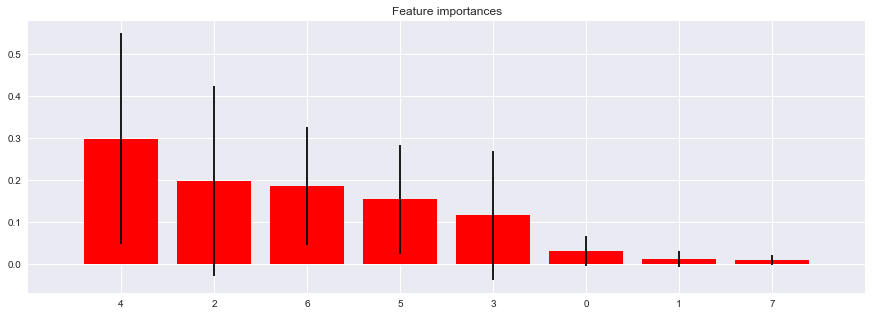

In [221]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

features = columns[0:8]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [223]:
# Pickle the model on disk 
import pickle
file = open('rupture_random_forest.pkl', 'wb')
pickle.dump(model, file)
file.close()

In [2]:
# open pickle
import pickle
file = open('rupture_random_forest.pkl', 'rb')
model = pickle.load(file)

In [5]:
Y_pred = model.predict(X_test)
print(Y_pred[0])

Y_test_class = np.argmax(Y_test, axis = 1)
y_pred_class = np.argmax(Y_pred, axis = 1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test_class, y_pred_class))
print(classification_report(Y_test_class, y_pred_class))

NameError: name 'X_test' is not defined